# Dreidimensionale Darstellungen

## Matplotlib
MittMatplotlib können wir dreidimensionale Darstellungen erzeugen. In diesem Notebook sehen wir, wie wir 
eine 3D-Darstellung erstellen, wie wir die Ansicht in 3D durch Manipulation der Winkel verändern und wir wir mit Hilfe
von magic commands eine interaktive Darstellung anstossen können.

### Ein einfacher 3D Scatterplot
Als Beispiel für eine dreidimensionale Darstellung erstellen wir einen 3D Scatterplot. Das API für die dreidimensionalen Grafiken ist bewusst so gestaltet worden, dass wir keine großen Unterschiede bemerken. wichti ist die Erzeugung eines Objekts vom Typ *Axes3D* mit Hilfe der Zeile *ax = fig.add_subp.lot(111, projection='3D')*.

Text(0.5, 0, 'z')

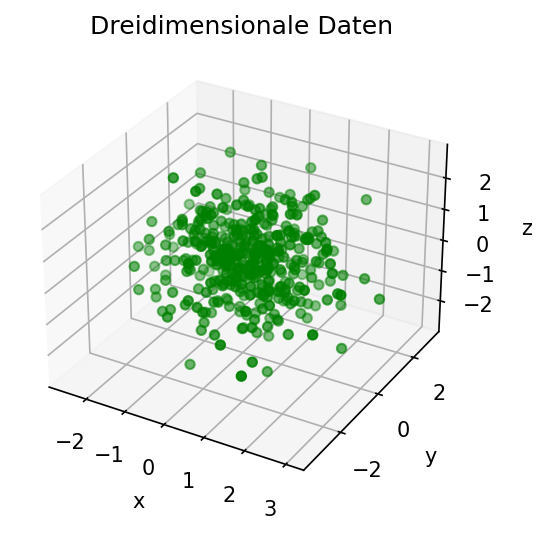

In [1]:
import matplotlib.pyplot as plt
import numpy as np

n = 400
x = np.random.randn(n)
y = np.random.randn(n)
z = np.random.randn(n)

fig = plt.figure(dpi=150)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='g', marker='o')
ax.set_title('Dreidimensionale Daten')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

Die erstellte dreidimensionale Darstellung verwendet einen Azimuth- und einen Elevations-Winkel in Kugelkoordinaten, mit denen wir die Ansicht definieren. Der Azimuth-Winkel ist eine Rotation um die z-Achse, der Elevations-Winkel gehört zu einer Rotation um die x-Achse.

Mit Hilfe der Funktion *ax.view_init(elevation, azimuth)* können wir diese Winkel auch setzen und damit die erzeugte Abbildung verändern. Im folgenden Beispiel verändern wir den Azimutz-Winkel vom Default-Wert -60 Grad auf 60 Grad. Man erkennt den Unterschied gut an der Achenbeschriftung!

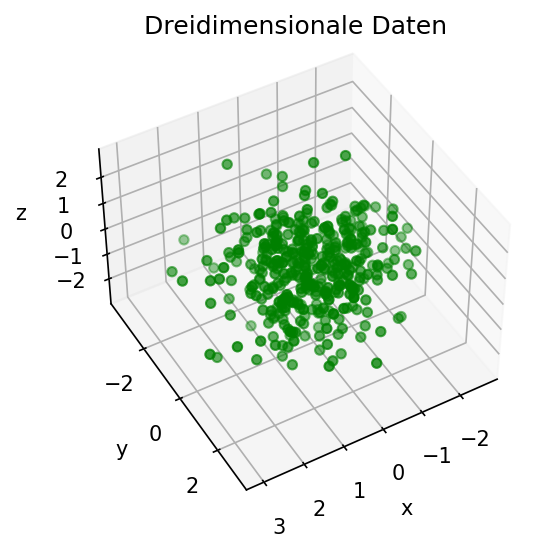

In [2]:
fig = plt.figure(dpi=150)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='g', marker='o')
ax.set_title('Dreidimensionale Daten')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
elevation = 45
azimuth = 60
ax.view_init(elevation, azimuth)

### Interaktive dreidimensionale Grafiken
vorausgesetzt die korrekte *IPython*-Version ist installiert können wir eine interaktive Darstellung erhalten, die wir mit Hilfe der Maus manipulieren können. Die Performanz ist nicht mit OpenGL vergleichbar, aber die aktuelle Ansicht kann als png abgespeichert werden und Elemente in der Grafik wie Farbtabellen kann verändert werden.

Dazu verwenden wir ein *magic*-command für Matplotlib. In IPython oder einem Notebook wie dem vorliegenden verwenden wir die Anweisung *%matplotlib qt*. Mit der Anweisung *%matplotlib inline* erhalten wir wieder die Ausgangssituation,
in der wir ein png der erstellten Abbildung erhalten. Dies ist auch der Default, den wir bisher verwendet haben.

Wir wechseln jetzt mit der folgenden Zelle in das Qt-Interface:
*%matplotlib qt*.

Jetzt erhalten wir die Grafik nicht mehr im Dokument, sondern es wird ein eigenes Qt-Fenster geöffnet. 
Wir können die Einstellungen mit *%matplotlib inline* wieder auf den Default einstellen und erhalten wieder ein Bild im Text.

### Eine animierte Ansicht
Wir können die beiden Ansichtswinkel in einer Schleife manipulieren und erhalten so eine drehende Ansicht. Wir sehen diese Animation in einem Qt-Fenster, da wir vorher das magic-command *%matplotlib qt* eingegeben haben. Die Ausgabe erfolgt wiederum in einem separaten Qt-Fenster außerhalb des Browsers.

In [3]:
%matplotlib qt

n = 400
x = np.random.randn(n)
y = np.random.randn(n)
z = np.random.randn(n)
value = np.sqrt(x*x + y*y + z*z)

fig = plt.figure(dpi=150)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='g', marker='o')
ax.set_title('Dreidimensionale Daten')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

elevation = 45
for angle in range(0, 360):
    ax.view_init(elevation, angle)
    plt.draw()
    plt.pause(.001)

## Plotly
Auch Plotly bietet die Möglichkeit interaktive dreidimensionale Darstellungen zu erhalten. Die Daten für den 3D Scatterplot aus dem Abschnitt für Matplotlib verwenden wir weiter. Damit erzeugen wir jetzt eine Plotly-Ausgabe. Hier können wir direkt, ohne weitere Vorbereitungen, die Ansicht verändern und das Ergebnis auch wieder abspeichern.

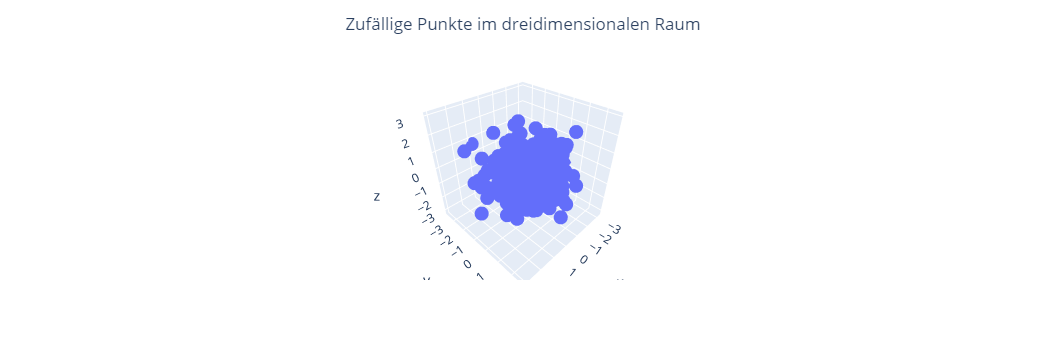

In [5]:
import plotly.express as px

fig = px.scatter_3d(x=x, y=y, z=z)

fig.update_layout(title='Zufällige Punkte im dreidimensionalen Raum',
                  title_x=0.5
                  )